# Market risk and portfolio theory - MATH0094
## In class exam
### November 21 - 2022


Time: 1h 30 minutes.
Marks for each question are indicated in square brackets.


### Instructions
- The exam has to be completely done in the corresponding CoCalc folder. Apart from this you only require pen and paper.
- You can only use the material available in Cocalc including the Python documentation available from the Help. 
- You can only ask to clarify something on the paper. No request for help is accepted unless an unexpected technical problem arises.
- You can add as many cells as needed. Bear in mind that some of the cells you start with are 'read only': you cannot modify these cells
- I have provided some tests to help you. You can run them by clicking on the 'validate' button (no errors, means you pass the pre-delivered tests). 
- Explain your code using both comments and Markdown cells as needed.


**Important:** You must accept to solve this assessment in accordance to the above instructions and UCL's code of honour. Please type the following sentence in the next cell: "I will answer this paper in accordance with the given instructions and UCL's code of honour".



In [2]:
# Some packages you might need in the following

from nose.tools import assert_equal, assert_raises  # Some functions to produce validations
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
from numpy.random import default_rng
from scipy.optimize import minimize 
import math

# Preliminaries

## Market model

Consider a **one-period** market model. The market is defined on a probability space $(\Omega,\mathbb P,\mathcal F)$ where $\Omega = \{1,2, \ldots,m \}$, $\mathcal F = \mathcal P(\Omega)= 2^\Omega$ and the probability $\mathbb P$ is such that $\mathbb P\{\omega = i \} = p_i$. We denote in what follows  $\mathbf p = (p_1, \ldots, p_m)$.

The market model has n+1 assets. The returns of the assets at time one for all scenarios are given by a matrix $R_{mat} = \{ R^i_1(j)\}_{i=0, \ldots, n; j=1, \ldots, m } \in \R^{(n+1)\times m} $.

# Questions


## Condor option

A unit condor option on the asset $i$, centred at $x_0$, upper amplitude $a$ and lower amplitude $b$, is a contingent claim that pays at time one a payoff $\Psi(S^i_1; x_0,a,b)$ where

$$\Psi(x;x_0,a,b)= \begin{cases}1 & \text{if }  |x-x_0| \leq a \\ \frac{ b-|x-x_0|}{b-a} & \text{if } |x-x_0|\in (a,b)\\ 0 & \text{otherwise} \end{cases}$$

where $0 \leq a<b; x_0 \in \R$




### Q1.
**Implement the condor payoff  $\Psi$. Take care of validating the relations of $a$ and $b$. Then, plot it for the case when $x_0=100$, $a=10, b=20$ for values of $x$ between 60 and 140.** [25 marks]

In [15]:
def condor_payoff(x,x0,a,b):
    """
    Compute the butterfly payoff having width 'd>0' and center 'x0' for a real 'x'
    """
    # YOUR CODE HERE
    if a < 0:
        raise ValueError()
    elif b <= a:
        raise ValueError()
    elif abs(x - x0) <= a:
        return 1
    elif abs(x - x0) >= b:
        return 0
    else:
        return (b - abs(x - x0))/(b-a)
    raise NotImplementedError()


1


In [16]:
# check implementation

assert math.isclose(condor_payoff(1,1,0.1,0.2),1, abs_tol=1e-10)
assert math.isclose(condor_payoff(0.2,1,0.1,0.2),0, abs_tol=1e-10)
assert math.isclose(condor_payoff(1.2,1,0.1,0.2),0, abs_tol=1e-10)


# Check that the function raises an error for invalid input
assert_raises(TypeError, condor_payoff, 'a',1,1,2)
assert_raises(ValueError, condor_payoff, 1,1,-1,2)
assert_raises(ValueError, condor_payoff, 1,1,2,1)


Write the code for the plot below:

Text(0, 0.5, 'payoff')

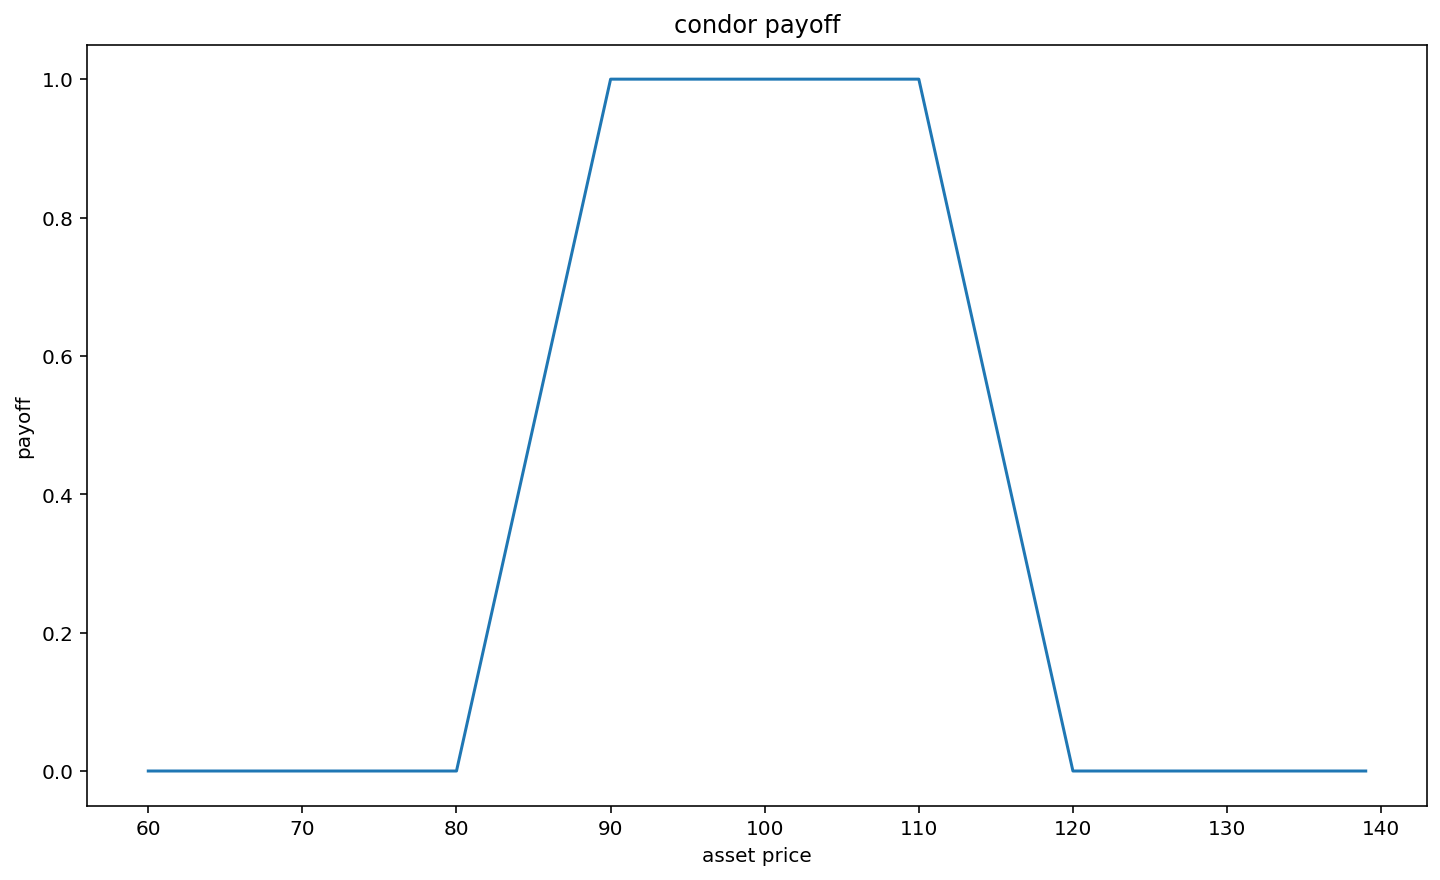

In [74]:
# YOUR CODE HERE
x = np.arange(60, 140, 1)
y = []
for xi in x:
    y.append(condor_payoff(xi, 100, 10, 20))
y = np.asarray(y)
plt.plot(x, y)
plt.title('condor payoff')
plt.xlabel('asset price')
plt.ylabel('payoff')


#raise NotImplementedError() # Delete this line once you implement your code

### Q2. 

**Assume that $n+1 = m$ (so that $R_{mat}$ is a square matrix) and that the market is complete. Write a function such that, given the matrix $Rmat$ and the values of a wealth profile at time $1$, produces a strategy to replicate $W$ in terms of amount invested on each asset.** 

 **The function should raise a ValueError if any of the following occur: i)If the market is not complete, ii) if the matrix is not square, and iii)if the zero asset is not risk-free.** [20 marks]



In [42]:
def replication_strategy(Rmat,W):  
    """
    Compute the replication strategy
    """
    # YOUR CODE HERE
    n = Rmat.shape[0]
    m = W.shape[0]
    if n != m:
        raise ValueError()
    elif np.linalg.matrix_rank(Rmat) != m:
        raise ValueError()
    else:
        return np.linalg.inv(Rmat) @ W
    #raise NotImplementedError()  # Delete this line once you implement your code

In [43]:

# check implementation

np.testing.assert_allclose(replication_strategy (np.array([[1,1,1],[1,1,0],[1,0,0]]),np.ones(3)), np.array([1,0,0]) , atol = 1e-10)
assert_raises(ValueError, replication_strategy, np.ones((4,4)), np.ones(4))




**Q3. Define a function that calculates the replication price of the condor option on the 'i'th asset (as defined previously) . The function should receive the parameters of the condor option, an integer 'i' signalling the asset over which it is defined, a vector with asset prices at zero ($S_0$) and the return matrix ($R_{mat}$)** [25 marks]

*Hint: You can (probably should) use the functions defined before (even if they are not working correctly).*



In [72]:
def condor_price(x0,a,b,i,S0,Rmat):  # modify function name and parameters
    """
    Computes the price of a condor option with parametres (x0,a,b) on the asset i, given initial market prices S0
    and return matrix Rmat
    """
    # YOUR CODE HERE
    W = []
    for S0i in S0:
        W.append(condor_payoff(S0i, x0, a, b))
    W = np.asarray(W)
    stra = replication_strategy(Rmat, S0) #why not W
    return stra[i]
#    raise NotImplementedError()  # Delete this line once you implement your code
#test
#print(condor_price(10,2,3,1,np.array([1,10,3]),np.array([[1,1,1],[2,1,0.6],[1,1.5,0.8]])))

In [73]:
# Check your solution

assert math.isclose(condor_price(10,2,3,1,np.array([1,10,3]),np.array([[1,1,1],[2,1,0.6],[1,1.5,0.8]])), 4/3, abs_tol=1e-10)
assert_raises(ValueError, condor_price, 10,2,3,1,np.array([1,10,3]), np.ones((3,3)) )



**Q4. A pure investor has a constant absolute risk aversion $\rho> 0$.  Write a function that returns the optimal strategy, in terms of  the *proportion invested*, for this investor in the discrete one-period market model given before, assuming it has an initial wealth $w_0=1$.**

**The function should receive the value of $\rho$, the market return matrix $R_{mat}$, and the probabilities vector $p$. It should return the optimal portfolio for this investor expressed as an (n+1)-dimensional array, or None if no solution is found.** [25 marks]



In [70]:
def optimal_strategy(Rmat, p, rho):
    """
    Compute optimal strategy for the investor with a constant absolute risk aversion equal to one and initial wealth w0
    """
    # YOUR CODE HERE
    n = 1000
    x_hat = np.array(0)
    sol = minimize(lambda x: Rmat@p, x_hat)
    if sol['success']:
        return sol['x'], -1 * sol['fun']
    else:
        return None
    
    #raise NotImplementedError()  # Delete this line once you implement your code

In [71]:

# Check your solution


np.testing.assert_allclose(optimal_strategy (np.array([[1,1],[1.25,0.5]]),np.array([2/3,1/3]), 2) , np.array([1,0]) ,atol = 5e-2,rtol=5e-2)



ValueError: The user-provided objective function must return a scalar value.